# Challenge 5

## Reading Materials

### Required Reading


## Activity 1
Due: November 8, 2018

In Activity 1, you are tasked with building a binary classifier based on SVM.
Each student has their own files, and should work in place.
```python
student_identity = 'netid'
training = '5challenge_training_' + student_identity + '.csv'
testing = '5challenge_testing_' + student_identity + '.csv'
```

### Data

The data is generated synthetically, one set for every student, using ```sklearn.datasets.make_classification```.


### Evaluation

Submissions will be scored according to Categorization Accuracy.
This Kaggle Metric requires the following columns: Id (String) and Category (String).
The solution file should be in a CSV format.


### File Descriptions

 * `5challenge_training_netid.csv` – the training data
 * `5challenge_testing_netid.csv` – the test data
 

### Deliverables

User submissions are evaluated by comparing their submission CSV to the ground truth solution CSV with respect to Categorization Accuracy.
Documents to be submitted are as follows.

__GitHub__: Every student should commit and push files.
 1. A pediction file; Fill column ```Class``` in the testing file.
     * `ECEN689-Fall2018 -> Challenges -> 5Files -> 5challenge_testing_netid.csv`
 2. Jupyter notebook code or Python code within your own directory.
 3. Describe the Kernel you used for your SVM. Plot the decision region juxtaposed with the training set.
     * `ECEN689-Fall2018 -> Students -> GitHubID -> 5challenge_testing_netid.csv`


In [37]:
import pandas as pd
from sklearn.metrics import accuracy_score

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import pylab as pl
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn import svm, datasets


In [38]:
student_identity = 'prabhtamu'

filenameToRead1 = '5challenge_training_' + student_identity + '.csv'
filenameToRead2 = '5challenge_testing_' + student_identity + '.csv'

training_df = pd.read_csv('C:/Users/prabh/Desktop/Challenge-5/' + filenameToRead1)
testing_df = pd.read_csv('C:/Users/prabh/Desktop/Challenge-5/' + filenameToRead2)

In [39]:
print(training_df.head())

   Unnamed: 0  Class  Feature 0  Feature 1
0           0      1   0.862660  -0.943378
1           1      1   0.570654   0.967684
2           2      0  -1.966213   1.397786
3           3      1   1.092152  -0.774553
4           4      0  -0.971771  -0.130819


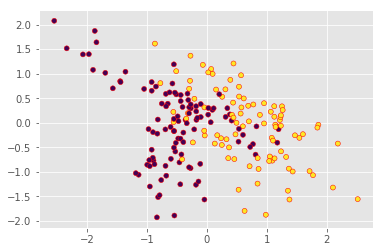

In [40]:
X1 = training_df[['Feature 0', 'Feature 1']].values
Y1 = training_df[['Class']].values

X2 = testing_df[['Feature 0', 'Feature 1']].values

plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1.ravel().tolist(),
            s=25, edgecolor='r')

plt.show()
plt.style.use('ggplot')

In [41]:
C_range = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]
gamma_range =[1e-09,1e-08,1e-07,1e-06,1e-05,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(kernel='rbf'), param_grid=param_grid, cv=cv)
grid.fit(X1, Y1.ravel())

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2,
            train_size=None),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'gamma': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000], 'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [42]:
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 1, 'gamma': 10} with a score of 0.87


In [43]:
scores = grid.cv_results_['mean_test_score'].reshape(len(C_range),
                                                     len(gamma_range))

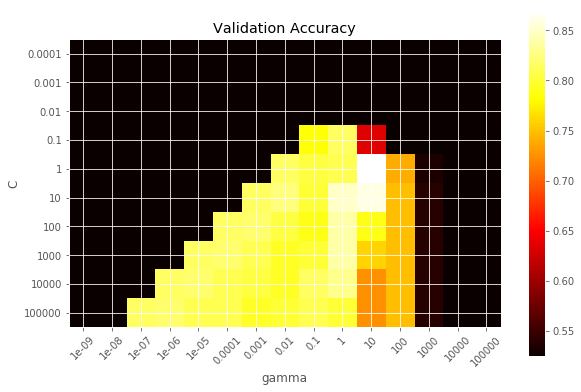

In [44]:
# Draw heatmap of the validation accuracy as a function of gamma and C
#
# The score are encoded as colors with the hot colormap which varies from dark
# red to bright yellow. As the most interesting scores are all located in the
# 0.92 to 0.97 range we use a custom normalizer to set the mid-point to 0.92 so
# as to make it easier to visualize the small variations of score values in the
# interesting range while not brutally collapsing all the low score values to
# the same color.
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation Accuracy')
plt.show()

In [45]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out




Automatically created module for IPython interactive environment


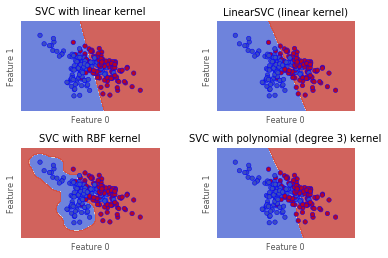

In [46]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=10, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X1, Y1.ravel()) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

Z0, Z1 = X1[:, 0], X1[:, 1]
xx, yy = make_meshgrid(Z0, Z1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(Z0, Z1, c=Y1.ravel(), cmap=plt.cm.coolwarm, s=20, edgecolors='b')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Feature 0',fontsize=8)
    ax.set_ylabel('Feature 1',fontsize=8)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title,fontsize=10)

plt.show()

In [47]:
rbf_svc = svm.SVC(kernel='poly',C=1,gamma=10).fit(X1, Y1.ravel())
Y2 =rbf_svc.predict(X2)
print(Y2)

[0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 1
 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 1 0 1
 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1
 0 0 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1
 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0]


In [48]:
Y2.shape

(200,)

In [49]:
testing_df.loc[:,'Class']= Y2

In [50]:
testing_df.to_csv('5challenge_testing_prabhtamu.csv', index= False)